In [174]:
# Importamos las librerías que vamos a utilizar:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas ---> nos ayuda a leer, organizar y trabajar con datos en forma de tablas, 
# como si fueran hojas de Excel
#_________________________________________________________________________________
# numpy ---> se usa para trabajar con números y cálculos matemáticos más avanzados o rápidos 
# que los de Python normal
#_________________________________________________________________________________
# matplotlib.pyplot --> es una herramienta para hacer gráficos
#_________________________________________________________________________________
# seaborn --> sirve para hacer gráficos más atractivos y fáciles de entender

In [175]:
# Importamos los Data sets al proyecto:

gaming_trends = pd.read_csv("../Datasets/Gaming_Trends/Gaming-Trends-2024.csv")
steam_store_2024 = pd.read_csv("../Datasets/steam_store_data_2024/steam_store_data_2024.csv")
steam_2022 = pd.read_csv("../Datasets/Steam2022/steam_games.csv", sep=';', encoding='utf-8')

# pd.read_csv --> es una función que abre los archivos y los convierte en una tabla que
# Python puede usar (un dataframe)
#____________________________________________________________________________________
# sep=';' --> le decimos a pandas que las columnas en este archivo están separadas por 
# punto y coma
#____________________________________________________________________________________
# encoding='utf-8' --> le decimos que use el formato de texto UTF-8, 
# que es como decirle que lea los caracteres de forma correcta (en este caso)

C:\Users\0Tene\AppData\Local\Temp\ipykernel_9988\3941507184.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_2022 = pd.read_csv("../Datasets/Steam2022/steam_games.csv", sep=';', encoding='utf-8')


In [176]:
# Juntamos los datasets según sus columnas
# Convertimos las fechas a tipo datetime para poder usarlas después y
# renombramos columnas 

gaming_trends = gaming_trends.rename(columns={"Date": "date", "Platform": "platform"})
steam_2022 = steam_2022.rename(columns={"Name": "title", "Release Date": "date", "Platforms": "platform", "Initial Price": "price"})
steam_store_2024 = steam_store_2024.rename(columns={"name": "title"})

# En el archivo de tendencias (gaming_trends), hay una columna que se llama "Date" con D mayúscula y otra que se llama "Platform".
# Aquí las estamos renombrando a "date" y "platform" en minúsculas
#_________________________________________________________________________________________
# En el dataset de Steam 2022:
# "Name" lo cambiamos por "title" → porque otros datasets también lo llaman así
# "Release Date" lo cambiamos por "date" --> para que coincida con gaming_trends
# "Platforms" lo cambiamos por "platform" --> para alinearlo con los otros dos
# "Initial Price" lo cambiamos por "price" --> para que se entienda igual en todos los archivos
#_________________________________________________________________________________________
# Por último, en steam_store_2024, la columna "name" también se refiere 
# al nombre del juego.
# Así que la cambiamos a "title" otra vez

In [177]:
# Convertimos fechas en formato datetime

gaming_trends['date'] = pd.to_datetime(gaming_trends['date'], errors='coerce')
steam_2022['date'] = pd.to_datetime(steam_2022['date'], errors='coerce')

# Estamos tomando la columna "date" del dataset gaming_trends.
# Le estamos aplicando pd.to_datetime, que es una función de pandas que
# convierte texto en fechas tipo datetime
# El parámetro errors='coerce' hace que si no se pudiera convertir algo 
# porque está mal escrito, vacío o raro o lo que sea, se le ponga un valor nulo o
# los marca como vacíos

In [178]:
# Juntamos steam_2022 y steam_store_2024 usando la columna 'title' como clave

steam_merged = pd.merge(steam_2022, steam_store_2024[['title', 'price']],\
on='title', how='left', suffixes=('_2022', '_2024'))

# En esta parte  usamos la función merge de pandas 
# merge se usa para unir dos tablas en base a una columna en común
# El resultado se guarda en una nueva tabla llamada steam_merged

In [179]:
# Volvemos a unir pero ahora con gaming_trends usando 'date' y 'platform'

final_df = pd.merge(steam_merged, gaming_trends, on=['date', 'platform'], how='left')

# Casi lo mismo que arriba 

In [180]:
# Mostramos el resultado unificado

final_df.head(2)
final_df.info()

# Utilizamos la funcion head(2) para que nos muestre los primeros valores que
# hay en nuestra nueva tabla
# La funcion info() la utilizaremos para ver todas las columnas que hay en el dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55697 entries, 0 to 55696
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   App ID                      55697 non-null  int64         
 1   title                       55697 non-null  object        
 2   Short Description           55660 non-null  object        
 3   Developer                   55567 non-null  object        
 4   Publisher                   55524 non-null  object        
 5   Genre                       55536 non-null  object        
 6   Tags                        55562 non-null  object        
 7   Type                        55697 non-null  object        
 8   Categories                  54727 non-null  object        
 9   Owners                      55697 non-null  object        
 10  Positive Reviews            55697 non-null  int64         
 11  Negative Reviews            55697 non-null  int64     

In [181]:
# Guardamos una copia del DataFrame limpio para el análisis siguiente

df = final_df.copy()

# Creamos una copia de la tabla en donde podamos trabajar

In [182]:
# Aumentamos el tamaño de fuente de los gráficos

plt.rcParams.update({'font.size': 10})

# plt es el apodo de matplotlib.pyplot, la librería para hacer gráficos.
# rcParams es como un diccionario de configuraciones globales para todos los
# gráficos que hagamos con matplotlib.
# Ahí se pueden cambiar cosas como los colores, el tamaño del texto,
# En nuestro caso, el tamaño de fuente 

# Hipótesis 1: Juegos por estación del año


In [183]:
# Nos quedamos con fechas válidas entre 2019 y 2022

df_season = df[(df['date'].dt.year >= 2019) & (df['date'].dt.year <= 2022)].copy()

# Creamos una nueva tabla llamada df_season
# La vamos a usar para analizar en qué estación del año se lanzaron los juegos
# df['date'] --> toma la columna que tiene las fechas
# .dt.year --> extrae solo el año de cada fecha

In [184]:
# Creamos función para clasificar por estación del año

def get_season(date):
    if pd.isna(date):
        return 'Desconocido'
    month = date.month
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'


# Aquí estamos creando una función que se va a llamar get_season
# Esta función recibe una fecha y nos va a devolver el nombre de la estación
# Si por alguna razón la fecha está vacía o es inválida, usamos pd.isna para detectarlo
# En ese caso, devolvemos 'Desconocido' como respuesta

In [185]:
# Aplicamos la función

df_season['season'] = df_season['date'].apply(get_season)

In [186]:
# Contamos cuántos juegos salieron por estación

season_counts = df_season['season'].value_counts()
season_percentages = season_counts / season_counts.sum() * 100

# Aquí estamos trabajando con la columna 'season' del DataFrame df_season 
# .value_counts() cuenta cuántas veces aparece cada valor único en esa columna

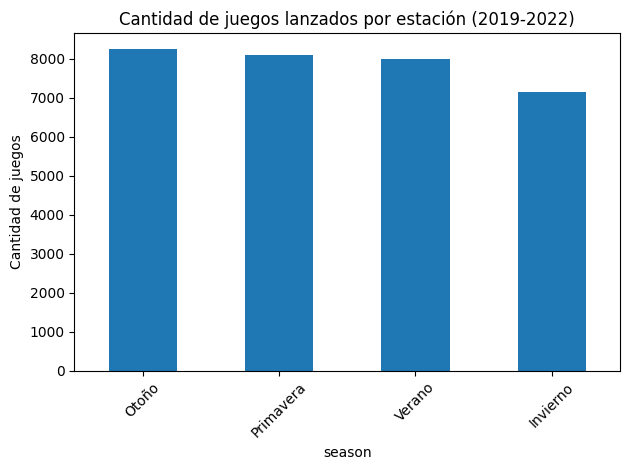

In [187]:
# Graficamos

fig, ax = plt.subplots()
season_counts.plot(kind='bar', ax=ax)
ax.set_title('Cantidad de juegos lanzados por estación (2019-2022)')
ax.set_ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# fig es la figura completa, y ax es el área donde vamos a dibujar el gráfico
# plot(kind='bar') dice que queremos un gráfico de barras
# ax=ax le indica que queremos dibujar el gráfico en ese espacio que acabamos de crear (ax)
# Esto gira las etiquetas del eje X (las estaciones) 45 grados
# Esta función ajusta los márgenes del gráfico para que nada quede cortado 

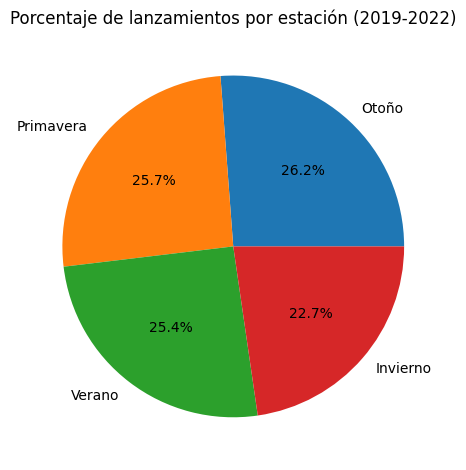

In [188]:
# También mostramos los porcentajes

fig, ax = plt.subplots()
season_percentages.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Porcentaje de lanzamientos por estación (2019-2022)')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Usamos los porcentajes de lanzamientos por estación
# .plot(kind='pie') genera un gráfico de pastel/ circular
# autopct='%1.1f%%' es para mostrar los valores como porcentaje en cada porción del pastel

# Hipótesis 2: Género más común en Steam

In [189]:
# Nos quedamos con juegos válidos entre 2019 y 2022 y que tengan género

df_genre = df[(df['date'].dt.year >= 2019) & (df['date'].dt.year <= 2022)]
df_genre = df_genre[df_genre['Genre'].notna()].copy()

# df['date'].dt.year --> saca el año de la columna de fechas
# >= 2019 y <= 2022 --> se queda solo con los juegos dentro de ese rango

In [190]:
# Muchos juegos tienen varios géneros separados por comas
# Separamos y contamos cada uno por separado

all_genres = df_genre['Genre'].str.split(',', expand=True).stack().str.strip()
top_genre = all_genres.value_counts().idxmax()
genre_counts = all_genres.value_counts()

# Toma la columna 'Genre'y .str.split(',') divide el texto en partes separadas por comas
# Así, 'Action, Indie' se convierte en una lista: ['Action', 'Indie']
# Le indica a pandas que expanda esas listas en columnas separadas
# .stack() --> convierte esas columnas en una única columna vertical, una debajo de otra
# Así conseguimos una gran lista con todos los géneros por separado, aunque vengan de distintas filas

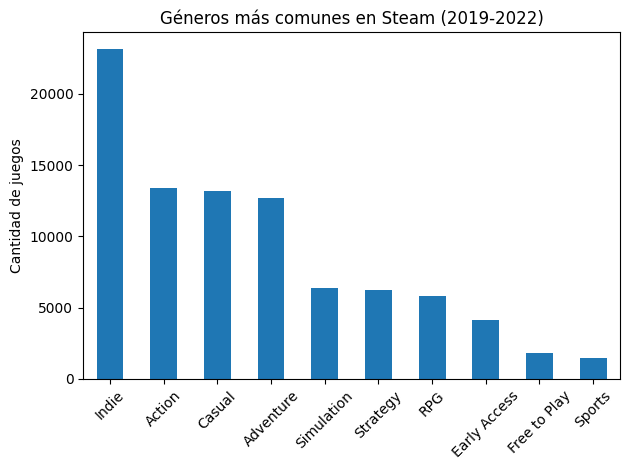

In [191]:
# Hacemos una gráfica con los 10 géneros más comunes

fig, ax = plt.subplots()
genre_counts.head(10).plot(kind='bar', ax=ax)
ax.set_title('Géneros más comunes en Steam (2019-2022)')
ax.set_ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# omamos genre_counts, que tiene cuántas veces aparece cada género
# .head(10) --> selecciona los 10 primeros, que son los más comunes
# .plot(kind='bar') --> genera un gráfico de barras con esos datos

In [192]:
top_genre

'Indie'

# Hipótesis 3: Precio más común

In [193]:
# Filtramos solo los juegos que incluyen el género "Indie"

indie_games = df_genre[df_genre['Genre'].str.contains('Indie', na=False)]

# Toma la columna 'Genre', que contiene los géneros de cada juego
# .str.contains('Indie') busca si la palabra "Indie" aparece dentro del texto de cada fila

In [194]:
# Nos aseguramos de convertir los precios a valores numéricos
# Algunos precios vienen con comas o símbolos

def parse_price(price):
    if pd.isna(price):
        return None
    if isinstance(price, str):
        price = price.replace('$', '').replace(',', '').strip()
    try:
        return float(price)
    except:
        return None
    
# Primero revisamos si el valor price está vacío o es inválido
# pd.isna(price) devuelve True si el valor no existe o es inválido
# En ese caso, devolvemos None directamente

In [195]:
# Aplicamos la conversión

indie_games['clean_price'] = indie_games['Price'].apply(parse_price)

C:\Users\0Tene\AppData\Local\Temp\ipykernel_9988\2999159580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indie_games['clean_price'] = indie_games['Price'].apply(parse_price)


In [196]:
# Contamos precios más comunes

price_mode = indie_games['clean_price'].mode().iloc[0]
price_counts = indie_games['clean_price'].value_counts().sort_index()

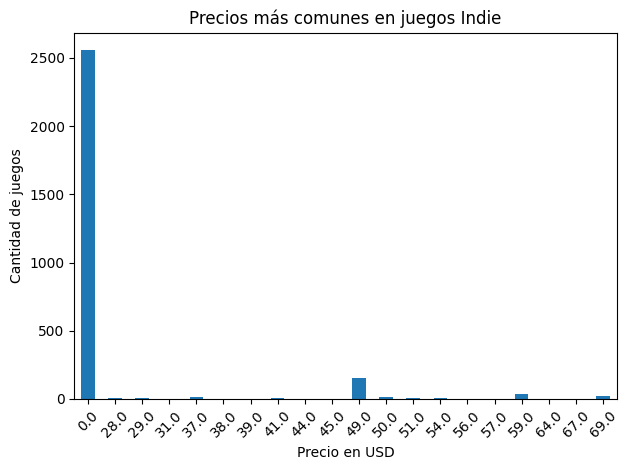

In [197]:
# Graficamos distribución de precios

fig, ax = plt.subplots()
price_counts.head(20).plot(kind='bar', ax=ax)
ax.set_title('Precios más comunes en juegos Indie')
ax.set_xlabel('Precio en USD')
ax.set_ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [198]:
price_mode

np.float64(499.0)

In [199]:
# Volvemos a aplicar el análisis usando los otros datos de precio 

indie_games['clean_price'] = indie_games['price_2022'].apply(parse_price)

C:\Users\0Tene\AppData\Local\Temp\ipykernel_9988\3402242251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indie_games['clean_price'] = indie_games['price_2022'].apply(parse_price)


In [200]:
# Filtramos valores válidos

indie_price_counts = indie_games['clean_price'].value_counts().sort_index()
indie_price_mode = indie_games['clean_price'].mode().iloc[0]

# Toma la columna 'clean_price', que contiene los precios ya limpios y convertidos en números
# Tomamos el primer valor de esa lista, en caso de que haya varios empatados
# Por ejemplo, si muchos juegos son gratuitos, mode() devolverá 0.0

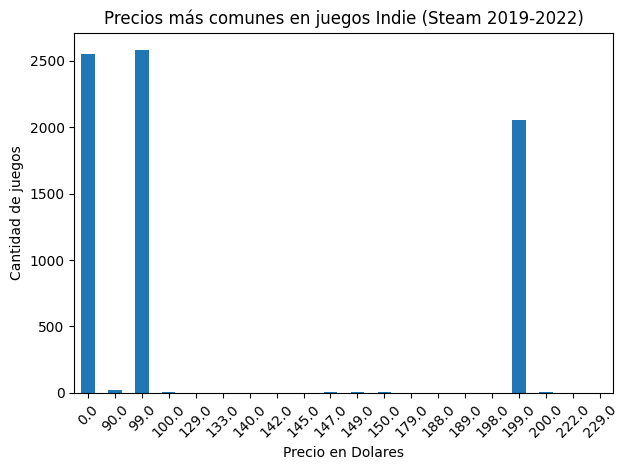

In [201]:
# Graficamos los precios más comunes para juegos Indie

fig, ax = plt.subplots()
indie_price_counts.head(20).plot(kind='bar', ax=ax)
ax.set_title('Precios más comunes en juegos Indie (Steam 2019-2022)')
ax.set_xlabel('Precio en Dolares')
ax.set_ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hipótesis 4: Precio más común en Steam (2019-2022)

In [202]:
# Usamos el mismo DataFrame df_genre con juegos entre 2019 y 2022
# pero ahora para analizar todos los géneros
# Convertimos 'price_2022' a numérico

df_genre['clean_price'] = df_genre['price_2022'].apply(parse_price)

In [203]:
# Contamos precios más comunes

all_price_counts = df_genre['clean_price'].value_counts().sort_index()
all_price_mode = df_genre['clean_price'].mode().iloc[0]

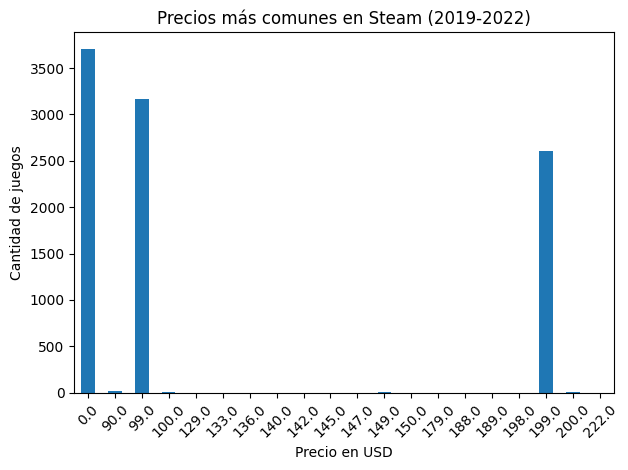

In [204]:
# Hacemos la gráfica de los precios más frecuentes

fig, ax = plt.subplots()
all_price_counts.head(20).plot(kind='bar', ax=ax)
ax.set_title('Precios más comunes en Steam (2019-2022)')
ax.set_xlabel('Precio en USD')
ax.set_ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hipótesis 5: Juegos más vendidos según número de propietarios

In [205]:
# Usamos el campo 'Owners', que tiene rangos como '100,000 .. 200,000'
# Vamos a tomar el valor mínimo del rango como estimación

def parse_owners(owners_str):
    if pd.isna(owners_str):
        return 0
    try:
        return int(owners_str.split('..')[0].replace(',', '').strip())
    except:
        return 0

# Estamos definiendo una función llamada parse_owners (parse = proceso de tomar una cadena de texto )
# Recibe como entrada un valor de texto que representa el 
# rango estimado de jugadores que tienen ese juego
# Si el valor está vacío, mal escrito o es nulo, devolvemos 0
# Esto para evitar errores más y nos da algo con lo que trabajar

In [206]:
# Aplicamos la conversión

df_genre['estimated_owners'] = df_genre['Owners'].apply(parse_owners)

In [207]:
# Tomamos el top 10 de juegos con más propietarios

top_selling = df_genre[['title', 'estimated_owners']].sort_values\
(by='estimated_owners', ascending=False).drop_duplicates().head(10)

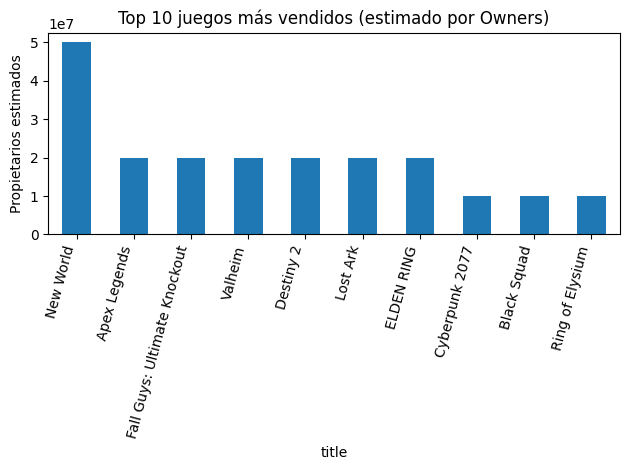

In [209]:
# Generamos los gráficos

fig, ax = plt.subplots()
top_selling.set_index('title').plot(kind='bar', ax=ax, legend=False)
ax.set_title('Top 10 juegos más vendidos (estimado por Owners)')
ax.set_ylabel('Propietarios estimados')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Mostramos la tabla 

top_selling

,title,estimated_owners
2250,New World,50000000
6006,Apex Legends,20000000
3403,Fall Guys: Ultimate Knockout,20000000
52046,Valheim,20000000
3015,Destiny 2,20000000
18430,Lost Ark,20000000
8304,ELDEN RING,20000000
3210,Cyberpunk 2077,10000000
39285,Black Squad,10000000
46854,Ring of Elysium,10000000


# Hipótesis 6: Porcentaje de ventas por género

In [ ]:
# Reutilizamos el campo de géneros separados y lo combinamos con estimated_owners

genre_sales = df_genre[['Genre', 'estimated_owners']].dropna().copy()
genre_sales['Genre'] = genre_sales['Genre'].str.split(',')

In [ ]:
# Expandimos los géneros

genre_expanded = genre_sales.explode('Genre')
genre_expanded['Genre'] = genre_expanded['Genre'].str.strip()

In [ ]:
# Agrupamos por género y sumamos ventas estimadas

sales_by_genre = genre_expanded.groupby('Genre')['estimated_owners'].sum().sort_values(ascending=False)

In [ ]:
# Calculamos porcentaje

sales_percentage = (sales_by_genre / sales_by_genre.sum()) * 100

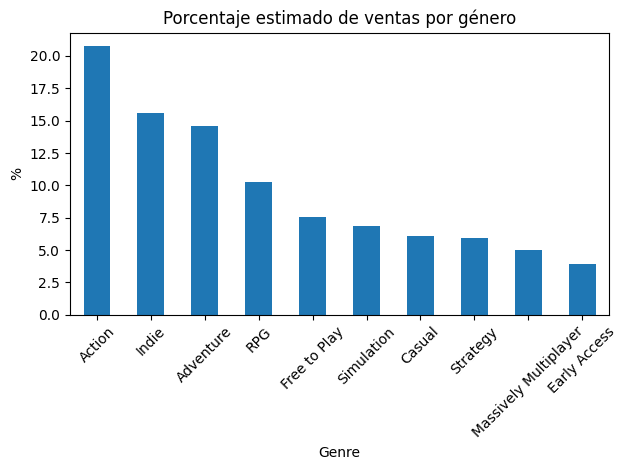

In [ ]:
# Mostramos los 10 géneros con más ventas

fig, ax = plt.subplots()
sales_percentage.head(10).plot(kind='bar', ax=ax)
ax.set_title('Porcentaje estimado de ventas por género')
ax.set_ylabel('%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sales_percentage.head(10)

Genre
Action                   20.745270
Indie                    15.570279
Adventure                14.617698
RPG                      10.233976
Free to Play              7.592084
Simulation                6.839772
Casual                    6.112855
Strategy                  5.909700
Massively Multiplayer     5.035321
Early Access              3.955479
Name: estimated_owners, dtype: float64